In [190]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import copy
import seaborn as sns
import time
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

# Converting the data into Binary Classification

In [191]:
#Initial Data
data = pd.read_csv('SeoulBikeData.csv',encoding= 'unicode_escape')
del data['Date']
# Creating Dummy Variables for Qualitative Predictors
SpringList=[0]*len(data)
SummerList=[0]*len(data)
AutumnList=[0]*len(data)

Holiday = [0]*len(data)

FunctioningDay = [0]*len(data)

for i in range(len(data)):
    if(data['Holiday'][i]=='Holiday'):
        Holiday[i]=1
    if(data['Functioning Day'][i]== 'Yes'):
        FunctioningDay[i]=1
    if(data['Seasons'][i]=='Spring'):
        SpringList[i]=1
    elif(data['Seasons'][i]=='Summer'):
        SummerList[i]=1
    elif(data['Seasons'][i]=='Autumn'):
        AutumnList[i]=1
        
data['Seasons_Spring'] = SpringList
data['Seasons_Summer'] = SummerList
data['Seasons_Autumn'] = AutumnList
data['Holiday_Dummy'] = Holiday
data['FunctioningDay'] = FunctioningDay

del data['Seasons']
del data['Holiday']
del data['Functioning Day']

In [192]:
data["Rented Bike Count"].median()

504.5

In [193]:
Bikes = copy.deepcopy(data)

median = data["Rented Bike Count"].median()

Median=[]
for bikes in data["Rented Bike Count"]:
    if (bikes>median):
        Median.append(1)
    else:
        Median.append(0)
        
Bikes["MedianBikes"] = Median

In [194]:
#Since Rented Bike Count and the Median Bikes
del Bikes["Rented Bike Count"]
Bikes

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Spring,Seasons_Summer,Seasons_Autumn,Holiday_Dummy,FunctioningDay,MedianBikes
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1,0
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1,0
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,0,1,0
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,0,1,0
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,0,1,0,1,1
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,0,1,0,1,1
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,0,1,0,1,1
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,0,1,0,1,1


# Splitting data into train and test sets

In [195]:
X = Bikes.iloc[:,:-1].values
Y = Bikes.iloc[:, -1].values
#Splitting data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y,test_size=0.3,random_state=0)

# SVM model

In [7]:
# Funtion to Implement SVM Classification
def SVM_Classification(kernel="rbf",probability=False):
    
    start_time = time.time()
    
    from sklearn.svm import SVC
    classifier = SVC(kernel=kernel,random_state=0,probability=probability)
    classifier.fit(X_train,Y_train)
    print("--- %s seconds ---" % (time.time() - start_time))
    
    #Predicting for test data
    Y_pred = classifier.predict(X_test)
    
    
    #Confusion Matrix
    cm=np.array(confusion_matrix(Y_test,Y_pred,labels=[0,1]))
    confusion = pd.DataFrame(cm, index=['Actual 0','Actual 1'],columns=['predicted as 0','predicted as 1'])
    #sns.heatmap(confusion, annot=True,fmt="d",cmap="YlGnBu")
    #plt.title("Confusion Matrix", fontsize = 20)
    acc=accuracy_score(Y_test,Y_pred)
    print("Accuracy of SVM Classification with ",kernel," kernel : ",acc)
    print("Error rate of SVM Classification with ",kernel," kernel : ",1-acc)
    
    

In [8]:
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
kernel_list=['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernel_list:
    SVM_Classification(kernel)
    

--- 113.27022695541382 seconds ---
Accuracy of SVM Classification with  linear  kernel :  0.8534246575342466
Error rate of SVM Classification with  linear  kernel :  0.14657534246575343
--- 1.521573781967163 seconds ---
Accuracy of SVM Classification with  poly  kernel :  0.7022831050228311
Error rate of SVM Classification with  poly  kernel :  0.2977168949771689
--- 1.6577680110931396 seconds ---
Accuracy of SVM Classification with  rbf  kernel :  0.7643835616438356
Error rate of SVM Classification with  rbf  kernel :  0.23561643835616441
--- 0.9798493385314941 seconds ---
Accuracy of SVM Classification with  sigmoid  kernel :  0.5200913242009132
Error rate of SVM Classification with  sigmoid  kernel :  0.4799086757990868


# Running SVM on Scaled Data features

In [196]:
# Applying Feature Scaling for Features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train) #applying on all features
X_test = sc.transform(X_test)

In [10]:
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
kernel_list=['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernel_list:
    SVM_Classification(kernel)

--- 0.7735180854797363 seconds ---
Accuracy of SVM Classification with  linear  kernel :  0.8625570776255708
Error rate of SVM Classification with  linear  kernel :  0.13744292237442923
--- 0.6182641983032227 seconds ---
Accuracy of SVM Classification with  poly  kernel :  0.8840182648401826
Error rate of SVM Classification with  poly  kernel :  0.11598173515981736
--- 0.5255281925201416 seconds ---
Accuracy of SVM Classification with  rbf  kernel :  0.8876712328767123
Error rate of SVM Classification with  rbf  kernel :  0.11232876712328765
--- 0.6307799816131592 seconds ---
Accuracy of SVM Classification with  sigmoid  kernel :  0.7899543378995434
Error rate of SVM Classification with  sigmoid  kernel :  0.2100456621004566


# SVM with ROC curves

In [8]:
# Funtion to Implement SVM Classification
def SVM_Classification2(kernel="rbf",probability=True,degree=3,C=1):
    
    start_time = time.time()
    
    from sklearn.svm import SVC
    classifier = SVC(kernel=kernel,random_state=0,probability=probability,degree=degree,C=C)
    classifier.fit(X_train,Y_train)

    #Predicting for test data
    Y_pred = classifier.predict(X_test)
    
    t = (time.time() - start_time)
    
    #Confusion Matrix
    cm=np.array(confusion_matrix(Y_test,Y_pred,labels=[0,1]))
    confusion = pd.DataFrame(cm, index=['Actual 0','Actual 1'],columns=['predicted as 0','predicted as 1'])
    #sns.heatmap(confusion, annot=True,fmt="d",cmap="YlGnBu")
    #plt.title("Confusion Matrix", fontsize = 20)
    
    acc=accuracy_score(Y_test,Y_pred)
    print("Accuracy of SVM Classification with ",kernel," kernel : ",acc)
    
    print("--- %s seconds ---" % (time.time() - start_time))
    
    probs = classifier.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(Y_test, preds)
    roc_auc = auc(fpr, tpr)


    return probs, preds, fpr, tpr, roc_auc, acc, t

Accuracy of SVM Classification with  linear  kernel :  0.8625570776255708
--- 4.198646068572998 seconds ---
Accuracy of SVM Classification with  poly  kernel :  0.8840182648401826
--- 3.396841287612915 seconds ---
Accuracy of SVM Classification with  rbf  kernel :  0.8876712328767123
--- 2.868649959564209 seconds ---
Accuracy of SVM Classification with  sigmoid  kernel :  0.7899543378995434
--- 4.096335172653198 seconds ---


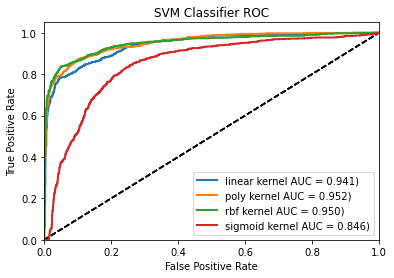

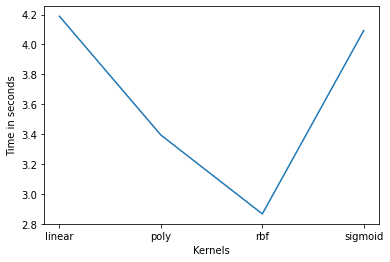

In [12]:
kernel_list=['linear', 'poly', 'rbf', 'sigmoid']
time_list=[]
for kernel in kernel_list:
    probs, preds, fpr, tpr, roc_auc,acc,t= SVM_Classification2(kernel)
    time_list.append(t)
    #GRAPH DATA
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1],linestyle='--',color='black')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('SVM Classifier ROC')
    plt.plot(fpr, tpr, lw=2, label=kernel+' kernel AUC = %0.3f)'%roc_auc)
    plt.legend()

plt.show()

plt.plot(kernel_list,time_list)
plt.xlabel("Kernels")
plt.ylabel("Time in seconds")
plt.show()

# SVM with Linear Kernel

Accuracy of SVM Classification with  linear  kernel :  0.8531202435312024
--- 3.303828239440918 seconds ---
Accuracy of SVM Classification with  linear  kernel :  0.8569254185692542
--- 2.488327980041504 seconds ---
Accuracy of SVM Classification with  linear  kernel :  0.8595890410958904
--- 1.6980228424072266 seconds ---
Accuracy of SVM Classification with  linear  kernel :  0.8599695585996956
--- 2.0712430477142334 seconds ---
Accuracy of SVM Classification with  linear  kernel :  0.8580669710806698
--- 2.4101979732513428 seconds ---
Accuracy of SVM Classification with  linear  kernel :  0.8584474885844748
--- 7.362607717514038 seconds ---


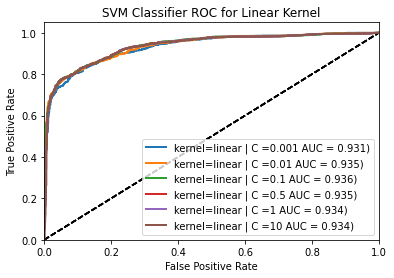

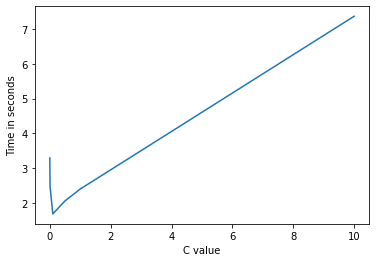

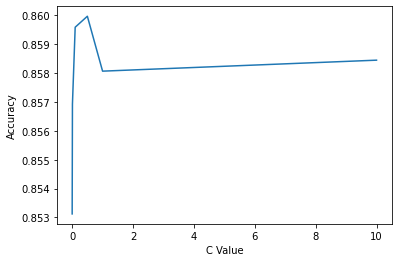

In [197]:
C = [0.001,0.01,0.1,0.5,1,10]
time_list=[]
accuracy=[]
for c in C:
    probs, preds, fpr, tpr, roc_auc,acc,t= SVM_Classification2(kernel='linear',C=c)
    time_list.append(t)
    accuracy.append(acc)
    #GRAPH DATA
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1],linestyle='--',color='black')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('SVM Classifier ROC for Linear Kernel')
    plt.plot(fpr, tpr, lw=2, label='kernel=linear | C ='+str(c)+' AUC = %0.3f)'%roc_auc)
    plt.legend(loc="lower right")

plt.show()

plt.plot(C,time_list)
plt.xlabel("C value")
plt.ylabel("Time in seconds")
plt.show()

plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.plot(C,accuracy)
plt.show()

# SVM with kernel = Polynomial

Accuracy of SVM Classification with  poly  kernel :  0.8595890410958904
--- 2.0971450805664062 seconds ---
Accuracy of SVM Classification with  poly  kernel :  0.8645357686453576
--- 2.1617660522460938 seconds ---
Accuracy of SVM Classification with  poly  kernel :  0.878234398782344
--- 3.100419044494629 seconds ---
Accuracy of SVM Classification with  poly  kernel :  0.8786149162861492
--- 2.3378000259399414 seconds ---
Accuracy of SVM Classification with  poly  kernel :  0.8808980213089802
--- 2.858412981033325 seconds ---


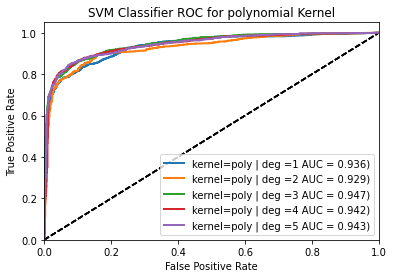

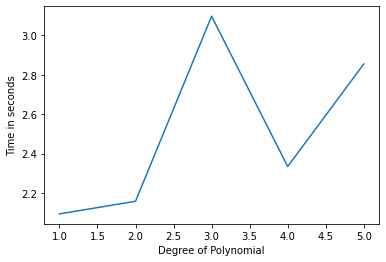

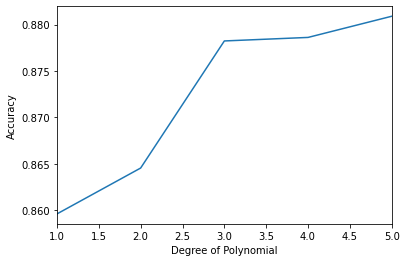

In [198]:
deg = [1,2,3,4,5]
time_list=[]
accuracy=[]
for d in deg:
    probs, preds, fpr, tpr, roc_auc,acc,t= SVM_Classification2(kernel='poly',degree=d)
    time_list.append(t)
    accuracy.append(acc)
    #GRAPH DATA
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1],linestyle='--',color='black')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('SVM Classifier ROC for polynomial Kernel')
    plt.plot(fpr, tpr, lw=2, label='kernel=poly | deg ='+str(d)+' AUC = %0.3f)'%roc_auc)
    plt.legend(loc="lower right")

plt.show()

plt.plot(deg,time_list)
plt.xlabel("Degree of Polynomial")
plt.ylabel("Time in seconds")
plt.show()

plt.xlabel('Degree of Polynomial')
plt.ylabel('Accuracy')
plt.xlim([1, 5])
#plt.ylim([0.8, 1.00])
plt.plot(deg,accuracy)
plt.show()

# SVM with RBF kernel

Accuracy of SVM Classification with  rbf  kernel :  0.5643074581430746
--- 11.534039974212646 seconds ---
Accuracy of SVM Classification with  rbf  kernel :  0.8493150684931506
--- 6.610277891159058 seconds ---
Accuracy of SVM Classification with  rbf  kernel :  0.8702435312024354
--- 4.751782178878784 seconds ---
Accuracy of SVM Classification with  rbf  kernel :  0.8755707762557078
--- 3.1701819896698 seconds ---
Accuracy of SVM Classification with  rbf  kernel :  0.882800608828006
--- 3.183542013168335 seconds ---
Accuracy of SVM Classification with  rbf  kernel :  0.898021308980213
--- 3.065444231033325 seconds ---
Accuracy of SVM Classification with  rbf  kernel :  0.9052511415525114
--- 3.806972026824951 seconds ---
Accuracy of SVM Classification with  rbf  kernel :  0.9113394216133942
--- 4.659610986709595 seconds ---


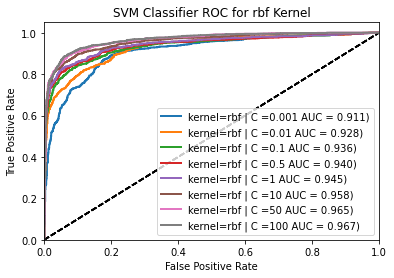

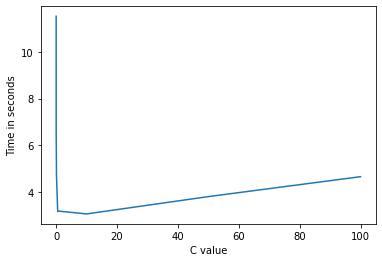

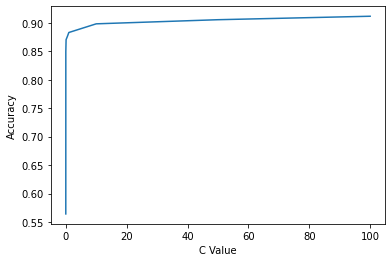

In [205]:
C = [0.001,0.01,0.1,0.5,1,10,50,100]
time_list=[]
accuracy=[]
for c in C:
    probs, preds, fpr, tpr, roc_auc,acc,t= SVM_Classification2(kernel='rbf',C=c)
    time_list.append(t)
    accuracy.append(acc)
    #GRAPH DATA
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1],linestyle='--',color='black')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('SVM Classifier ROC for rbf Kernel')
    plt.plot(fpr, tpr, lw=2, label='kernel=rbf | C ='+str(c)+' AUC = %0.3f)'%roc_auc)
    plt.legend(loc="lower right")

plt.show()

plt.plot(C,time_list)
plt.xlabel("C value")
plt.ylabel("Time in seconds")
plt.show()

plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.plot(C,accuracy)
plt.show()

# SVM with the best model parameters

Accuracy of SVM Classification with  linear  kernel :  0.8599695585996956
--- 2.280383348464966 seconds ---
Accuracy of SVM Classification with  poly  kernel :  0.878234398782344
--- 2.343851089477539 seconds ---
Accuracy of SVM Classification with  rbf  kernel :  0.9113394216133942
--- 4.276626110076904 seconds ---


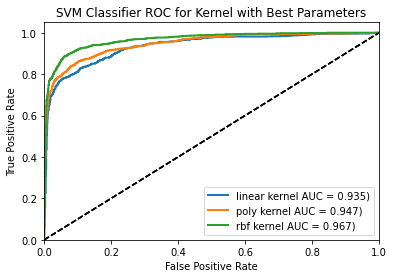

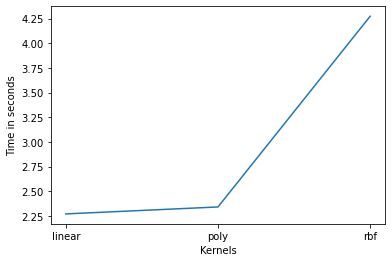

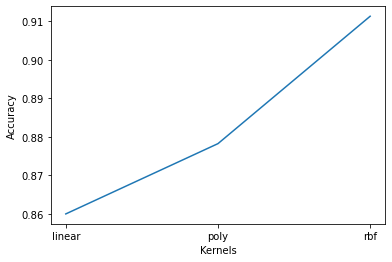

In [200]:
kernel = ['linear','poly','rbf']
time_list=[]
accuracy=[]
for k in kernel:
    if(k == 'linear'):
        probs, preds, fpr, tpr, roc_auc,acc,t= SVM_Classification2(kernel=k,C=0.5)
        time_list.append(t)
        accuracy.append(acc)
        plt.plot(fpr, tpr, lw=2, label=k+' kernel AUC = %0.3f)'%roc_auc)
    elif(k == 'poly'):
        probs, preds, fpr, tpr, roc_auc,acc,t= SVM_Classification2(kernel=k,degree=3)
        time_list.append(t)
        accuracy.append(acc)
        plt.plot(fpr, tpr, lw=2, label=k+' kernel AUC = %0.3f)'%roc_auc)
    elif(k == 'rbf'):
        probs, preds, fpr, tpr, roc_auc,acc,t= SVM_Classification2(kernel=k,C=100)
        time_list.append(t)
        accuracy.append(acc)
        plt.plot(fpr, tpr, lw=2, label=k+' kernel AUC = %0.3f)'%roc_auc)
    #GRAPH DATA
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.plot([0, 1], [0, 1],linestyle='--',color='black')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('SVM Classifier ROC for Kernel with Best Parameters')
    #plt.plot(fpr, tpr, lw=2, label='kernel AUC = %0.3f)'%roc_auc)
    plt.legend(loc="lower right")

plt.show()

plt.plot(kernel,time_list)
plt.xlabel("Kernels")
plt.ylabel("Time in seconds")
plt.show()

plt.xlabel('Kernels')
plt.ylabel('Accuracy')
plt.plot(kernel,accuracy)
plt.show()

# Using K-fold Cross Validation

In [202]:
# Applying Feature Scaling for Features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X) #applying on all features

In [203]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import SVC
poly = SVC(kernel='rbf',random_state=0,C=100)
scores = cross_val_score(poly,x,Y,cv=10,scoring="accuracy")
scores.mean()

0.7561643835616437

Mean Accuracy for C-Value 0.001 :  0.7565068493150684
Mean Accuracy for C-Value 0.01 :  0.7789954337899543
Mean Accuracy for C-Value 0.1 :  0.7583333333333334
Mean Accuracy for C-Value 1 :  0.7489726027397261
Mean Accuracy for C-Value 10 :  0.7535388127853881
Mean Accuracy for C-Value 100 :  0.7561643835616437


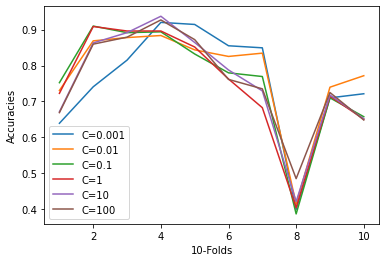

In [204]:
c_value=[0.001,0.01,0.1,1,10,100]
cv=list(range(1,11))
i=0
mscores = []
for c in c_value:
    poly = SVC(kernel='rbf',random_state=7,C=c)
    scores = cross_val_score(poly,x,Y,cv=10,scoring="accuracy")
    
    plt.plot(cv,scores,label="C="+str(c))
    plt.xlabel("10-Folds")
    plt.ylabel("Accuracies")
    plt.legend()
    i+=1
    print("Mean Accuracy for C-Value "+str(c)+" : ",scores.mean())
    mscores.append(scores.mean())
#plt.plot(cv, mscores, label="Mean Accuracy")
plt.show()

In [52]:
scores.mean()

0.9004566210045661

Text(0.5, 1.0, 'Confusion Matrix')

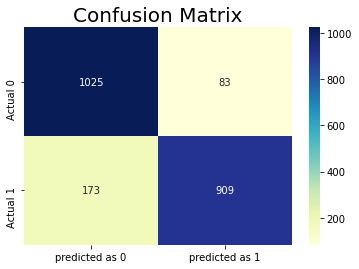

In [47]:
cm=np.array(confusion_matrix(Y_test,prediction,labels=[0,1]))
confusion = pd.DataFrame(cm, index=['Actual 0','Actual 1'],columns=['predicted as 0','predicted as 1'])
sns.heatmap(confusion, annot=True,fmt="d",cmap="YlGnBu")
plt.title("Confusion Matrix", fontsize = 20)

# Decision Tree Classification

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [153]:
classifier = DecisionTreeClassifier(criterion='gini', random_state=0)  
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

In [154]:
#Predicting for test data
y_pred = classifier.predict(X_test)

In [155]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test,y_pred)
print(cm)
accuracy_score(Y_test,y_pred)

[[1203  138]
 [ 123 1164]]


0.9006849315068494

In [156]:
# For Gene Index
accuracy_score(Y_test,y_pred)

0.9006849315068494

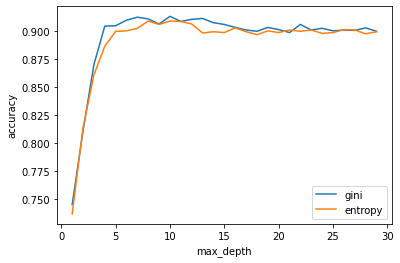

In [157]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
    dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
    dtree.fit(X_train,Y_train)
    pred = dtree.predict(X_test)
    acc_gini.append(accuracy_score(Y_test, pred))
    ####
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dtree.fit(X_train, Y_train)
    pred = dtree.predict(X_test)
    acc_entropy.append(accuracy_score(Y_test, pred))
    ####
    max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini),'acc_entropy':pd.Series(acc_entropy),'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [158]:
# From the above plot depth = 7 looks like a good metric with gene index
dtree = DecisionTreeClassifier(criterion='gini', max_depth=7,random_state=0)
dtree.fit(X_train,Y_train)
pred = dtree.predict(X_test)
accuracy_score(Y_test, pred)

0.9121004566210046

# Cross Validation

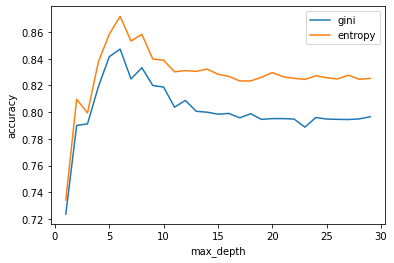

In [134]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
    dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
    scores_g = cross_val_score(dtree,X,Y,cv=10,scoring="accuracy")
    acc_gini.append(scores_g.mean())
    ####
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    scores_e = cross_val_score(dtree,X,Y,cv=10,scoring="accuracy")
    acc_entropy.append(scores_e.mean())
    ####
    max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini),'acc_entropy':pd.Series(acc_entropy),'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [187]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=6,random_state=25)
scores = cross_val_score(tree,X,Y,cv=10,scoring="accuracy")
scores.mean()

0.8714611872146121

In [188]:
# on training and testing data
clf = DecisionTreeClassifier(criterion='entropy', max_depth=6,random_state=25)
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.899923896499239

# Adaboost classification

In [149]:
X = Bikes.iloc[:,:-1].values
Y = Bikes.iloc[:, -1].values
#Splitting data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y,test_size=0.3,random_state=0)

In [150]:
from sklearn.ensemble import AdaBoostClassifier

In [165]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.91324200913242

# Cross Validation - AdaBoost

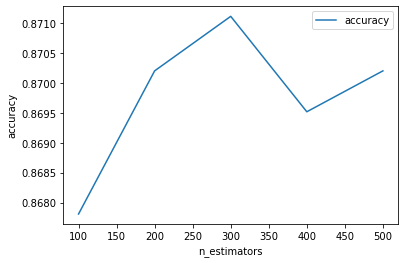

In [166]:
accuracy=[]
estimators=[100,200,300,400,500]
for n in estimators:
    boost = AdaBoostClassifier(n_estimators=n, random_state=0)
    scores_g = cross_val_score(boost,X,Y,cv=10,scoring="accuracy")
    accuracy.append(scores_g.mean())
    
plt.plot(estimators,accuracy,label='accuracy')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend()

[0.7240867579908675, 0.7631278538812786, 0.8551369863013699, 0.8711187214611872, 0.27625570776255703]


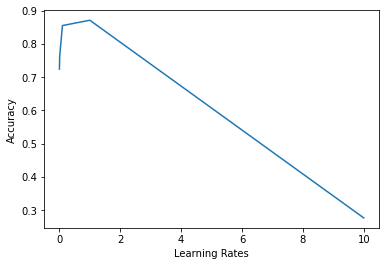

In [175]:
learningrate = [0.001,0.01,0.1,1,10]
accuracy=[]
for r in learningrate:
    clf = AdaBoostClassifier(n_estimators=300, random_state=0,learning_rate=r)
    scores = cross_val_score(clf,X,Y,cv=10,scoring="accuracy")
    accuracy.append(scores.mean())

print(accuracy)
plt.xlabel('Learning Rates')
plt.ylabel('Accuracy')
plt.plot(learningrate,accuracy)
plt.show()

In [189]:
#Cross Validation Accuracy
clf = AdaBoostClassifier(n_estimators=300, random_state=0, learning_rate=1)
scores = cross_val_score(clf,X,Y,cv=10,scoring="accuracy")
scores.mean()

0.8711187214611872

In [176]:
# On training and test set
clf = AdaBoostClassifier(n_estimators=300, random_state=0, learning_rate=1)
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.9162861491628614